In [1]:
%pylab inline
import h5py

sys.path.append('mnt/sw/nix/store/i4qqrrhx6cjsr6r2vl06h9fwbzc9qs8p-texlive-20210325/bin/x86_64-linux/')

plt.style.use("/mnt/home/nico/matplotlib.mplstyle")

#import nba
import sys
sys.path.append("/mnt/home/ecunningham/python")
sys.path.append("../scripts/src/")

import pynbody
import pynbody_routines as pr
import gizmo_analysis as ga

from matplotlib import colors
import halo_analysis as halo
import io_gizmo_pynbody as fa
#import analysis as fa

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rcParams['text.usetex'] = False

In [6]:
#!python -m pip install pynbody --user

In [7]:
orbit = np.loadtxt('../../../gadget_runs/orbits/MWLMC6_100M_b0_M03_sat_orbit_pos.txt')
orbit_h = np.loadtxt('../../../gadget_runs/orbits/MWLMC6_100M_b0_M03_host_orbit_pos.txt')

In [8]:
pos_sat = np.sqrt(np.sum((orbit-orbit_h)**2, axis=1))
pos_halo = np.sqrt(np.sum((orbit_h)**2, axis=1))

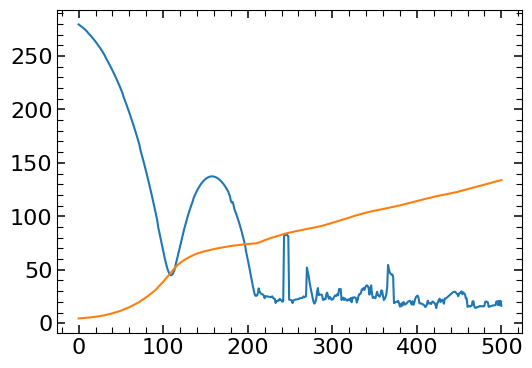

In [9]:
plt.plot(pos_sat)
plt.plot(pos_halo)

In [10]:
outer_halo_pos = np.loadtxt('../data/orbits/MWLMC6_100M_b0_MO3_host_outer_orbit_pos.txt')
outer_halo_vel = np.loadtxt('../data/orbits/MWLMC6_100M_b0_M03_host_outer_orbit_vel.txt')

In [11]:
disk_halo_vel6 = np.loadtxt('../data/orbits/MWLMC6_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos6 = np.loadtxt('../data/orbits/MWLMC6_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

disk_halo_vel5 = np.loadtxt('../data/orbits/MWLMC5_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos5 = np.loadtxt('../data/orbits/MWLMC5_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

disk_halo_vel4 = np.loadtxt('../data/orbits/MWLMC4_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos4 = np.loadtxt('../data/orbits/MWLMC4_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

disk_halo_vel3 = np.loadtxt('../data/orbits/MWLMC3_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos3 = np.loadtxt('../data/orbits/MWLMC3_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

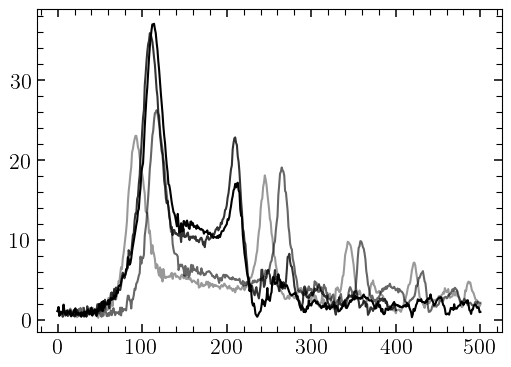

In [12]:
#plt.plot(np.sqrt(np.sum(outer_halo_pos**2, axis=1)))
plt.plot(np.sqrt(np.sum(disk_halo_pos6**2, axis=1)), c='k', alpha=1)
plt.plot(np.sqrt(np.sum(disk_halo_pos5**2, axis=1)), c='k', alpha=0.8)
plt.plot(np.sqrt(np.sum(disk_halo_pos4**2, axis=1)), c='k', alpha=0.6)
plt.plot(np.sqrt(np.sum(disk_halo_pos3**2, axis=1)), c='k', alpha=0.4)

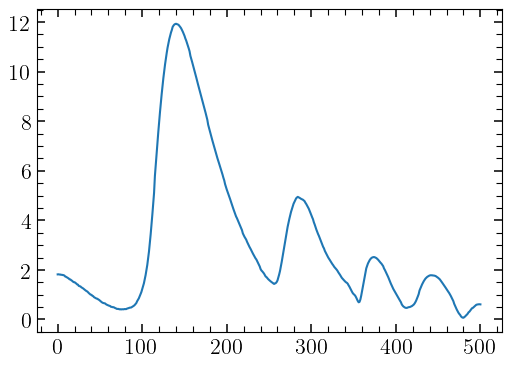

In [14]:
#plt.plot(np.sqrt(np.sum(outer_halo_vel**2, axis=1)))
plt.plot(np.sqrt(np.sum(disk_halo_vel4**2, axis=1)))

In [18]:
#h_rotations = pr.pynbody_halo(p)

In [19]:
#faceon, edgeon = pr.make_pynbody_rotations(h_rotations)

In [34]:
def host_velocities(sim):
    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)
    f = h5py.File(center_coordinates, 'r')
    vel = np.sqrt(np.sum(f['host.velocity'][1:,0]**2, axis=1))
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[1:], vel, f['host.velocity'][1:,:]

In [35]:
m12b_t, m12b_vel, m12b_3dv = host_velocities('m12b')
#m12c_t, m12c_vel, m12c_3dv = host_velocities('m12c')
#m12f_t, m12f_vel, m12f_3dv = host_velocities('m12f')
m12i_t, m12i_vel, m12i_3dv = host_velocities('m12i')
#m12m_t, m12m_vel, m12m_3dv = host_velocities('m12m')
#m12r_t, m12r_vel, m12r_3dv = host_velocities('m12r')
#m12w_t, m12w_vel, m12w_3dv = host_velocities('m12w')

In [36]:
MWLMC6_host_orbit = np.loadtxt('../data/orbits/out_MWLMC6_b0_host_orbit_OM3_G4')
MWLMC5_host_orbit = np.loadtxt('../data/orbits/out_MWLMC5_b0_host_orbit_OM3_G4')
MWLMC4_host_orbit = np.loadtxt('../data/orbits/out_MWLMC4_b0_host_orbit_OM3_G4')
MWLMC3_host_orbit = np.loadtxt('../data/orbits/out_MWLMC3_b0_host_orbit_OM3_G4')

#MWLMC5_sat_vel = np.loadtxt('/mnt/home/nico/gadget_runs/orbits/MWLMC5_100M_b0_M03_sat_orbit_vel.txt')
#MWLMC5_host_vel = np.loadtxt('/mnt/home/nico/gadget_runs/orbits/MWLMC5_100M_b0_M03_host_orbit_vel.txt')
#MWLMC6_host_vel = np.loadtxt('/mnt/home/nico/gadget_runs/orbits/MWLMC6_100M_b0_MO3_host_orbit')

In [37]:
np.shape(MWLMC6_host_orbit)

(401, 12)

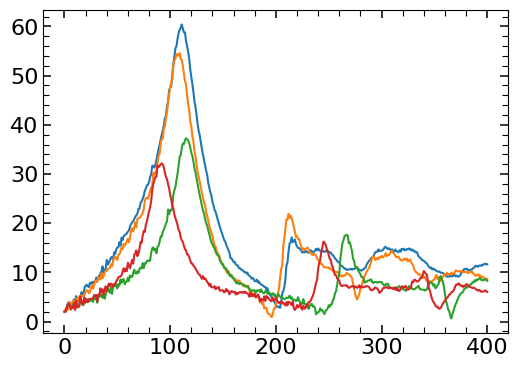

In [38]:
plt.plot(norm(MWLMC6_host_orbit[:,3:6], axis=1))
plt.plot(norm(MWLMC5_host_orbit[:,3:6], axis=1))
plt.plot(norm(MWLMC4_host_orbit[:,3:6], axis=1))
plt.plot(norm(MWLMC3_host_orbit[:,3:6], axis=1))


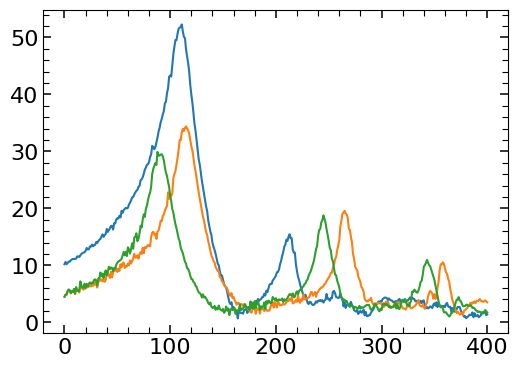

In [39]:
plt.plot(norm(MWLMC6_host_orbit[:,9:12], axis=1))
plt.plot(norm(MWLMC4_host_orbit[:,9:12], axis=1))
plt.plot(norm(MWLMC3_host_orbit[:,9:12], axis=1))


In [40]:
m12b_op_vmean = np.loadtxt('../scripts/src/m12b_op_median_vel_mass1e8.txt')
m12c_op_vmean = np.loadtxt('../scripts/src/m12c_op_median_vel_mass1e8.txt')
m12i_op_vmean = np.loadtxt('../scripts/src/m12i_op_median_vel_mass1e8.txt')
m12f_op_vmean = np.loadtxt('../scripts/src/m12f_op_median_vel_mass1e8.txt')
m12m_op_vmean = np.loadtxt('../scripts/src/m12m_op_median_vel_mass1e8.txt')
m12r_op_vmean = np.loadtxt('../scripts/src/m12r_op_median_vel_mass1e8.txt')
m12w_op_vmean = np.loadtxt('../scripts/src/m12w_op_median_vel_mass1e8.txt')

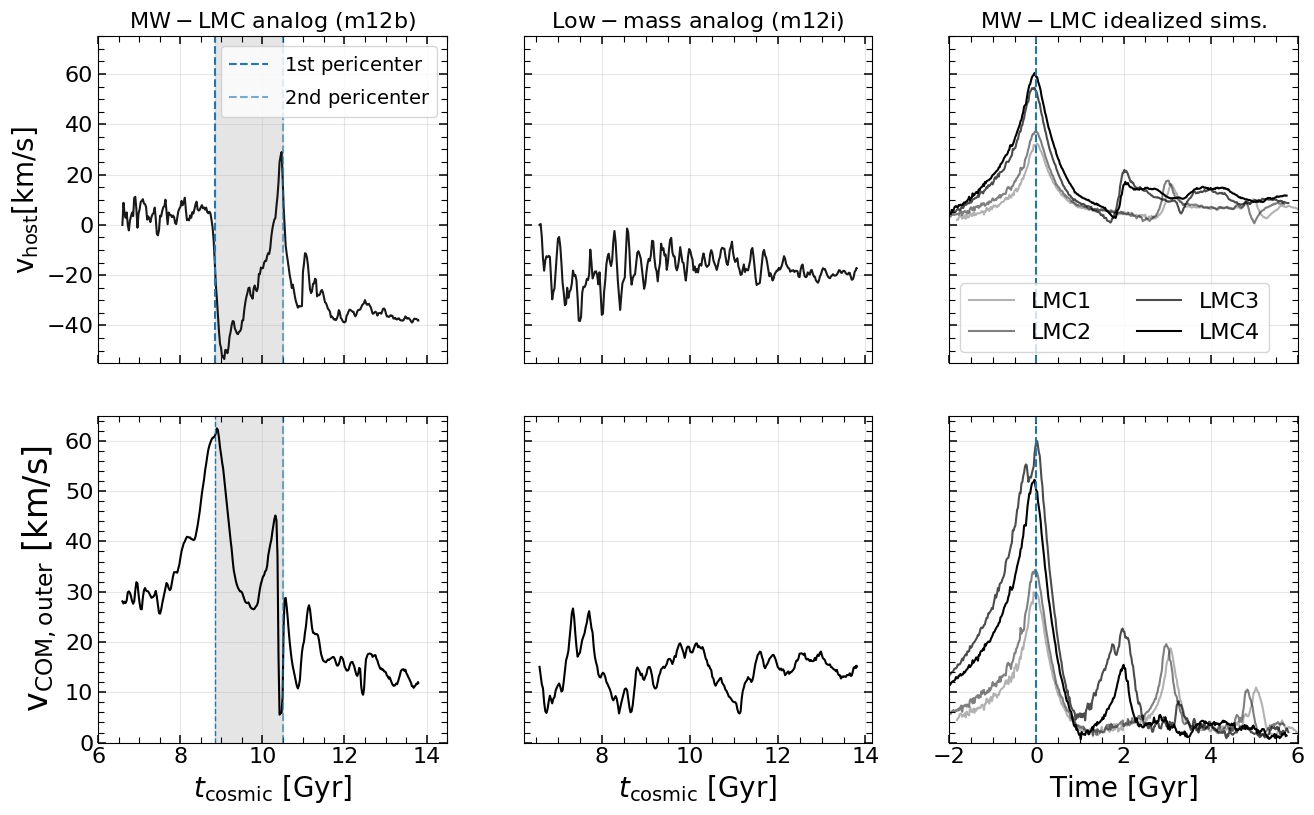

In [57]:

fig, ax = plt.subplots(2, 3, figsize=(14, 9), sharex='col', sharey='row')

# ------------

## Top panels 

## FIRE

ax[0][0].plot(m12b_t[299:], m12b_vel[299:]-m12b_vel[299], c='k', lw=1.5, alpha=0.9)
ax[0][1].plot(m12i_t[299:], m12i_vel[299:]-m12i_vel[299], c='k', lw=1.5, alpha=0.9)

t1 = np.linspace(0, 8, 401)
ax[0][2].plot(t1[:]-t1[91], norm(MWLMC3_host_orbit[:,3:6], axis=1), alpha=0.3, c='k', label='LMC1')
ax[0][2].plot(t1[:]-t1[116], norm(MWLMC4_host_orbit[:,3:6], axis=1), alpha=0.5, c='k', label='LMC2')
ax[0][2].plot(t1[:]-t1[111], norm(MWLMC5_host_orbit[:,3:6], axis=1), alpha=0.7, c='k', label='LMC3')
ax[0][2].plot(t1[:]-t1[113], norm(MWLMC6_host_orbit[:,3:6], axis=1), alpha=1, c='k', label='LMC4')


ax[0][0].fill_betweenx(np.linspace(-60, 75), m12b_t[385], m12b_t[450], color='Grey', alpha=0.2)
ax[1][0].fill_betweenx(np.linspace(-60, 75), m12b_t[385], m12b_t[450], color='Grey', alpha=0.2)


## Bottom panels plots  

## FIRE
ax[1][0].plot(m12b_op_vmean[:,0], np.sqrt(np.sum((m12b_op_vmean[:,1:4])**2, axis=1)), lw=1.5, c='k')
ax[1][1].plot(m12i_op_vmean[:,0], np.sqrt(np.sum(m12i_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')

## Idealized sims
ax[1][2].plot(t1[:]-t1[91],  norm(MWLMC3_host_orbit[:,9:12], axis=1), c='k', alpha=0.3, label='LMC1')
ax[1][2].plot(t1[:]-t1[116], norm(MWLMC4_host_orbit[:,9:12], axis=1), c='k', alpha=0.5, label='LMC2')
ax[1][2].plot(t1[:]-t1[111], norm(MWLMC5_host_orbit[:,9:12], axis=1), c='k', alpha=0.7, label='LMC3')
ax[1][2].plot(t1[:]-t1[113], norm(MWLMC6_host_orbit[:,9:12], axis=1), c='k', alpha=1.0, label='LMC4')

# -----------

## Titles:

ax[0][0].set_title(r'$\rm{MW-LMC\ analog\ (m12b)}$', fontsize=16)
ax[0][1].set_title(r'$\rm{Low-mass\ analog\ (m12i)}$', fontsize=16)
ax[0][2].set_title(r'$\rm{MW-LMC\ idealized\ sims.}$', fontsize=16)


# Pericenters marks

ax[0][0].axvline(m12b_t[385], ls='--',lw=1.5, label=r'$\rm{1st\ pericenter}$')
ax[0][0].axvline(m12b_t[450], ls='--',lw=1.5, label=r'$\rm{2nd\ pericenter}$', alpha=0.6)
ax[0][2].axvline(13.65, ls='--',lw=1)

ax[1][0].axvline(m12b_t[385], ls='--',lw=1)
ax[1][0].axvline(m12b_t[450], ls='--',lw=1.5, label=r'$\rm{2nd\ pericenter}$', alpha=0.6)
ax[1][2].axvline(13.65, ls='--',lw=1)

ax[1][2].axvline(0, ls='--',lw=1.5)
ax[0][2].axvline(0, ls='--',lw=1.5)

# Grid

ax[0][0].grid(alpha=0.3)
ax[0][1].grid(alpha=0.3)
ax[0][2].grid(alpha=0.3)

ax[1][0].grid(alpha=0.3)
ax[1][1].grid(alpha=0.3)
ax[1][2].grid(alpha=0.3)


# Axis limits

ax[0][0].set_xlim(6, 14.5)
ax[0][0].set_ylim(-55, 75)
ax[1][0].set_ylim(0, 65)
ax[0][2].set_xlim(-2, 6)




# Labels 

ax[1][0].set_xlabel(r'$t\rm{_{cosmic}\ [Gyr]}$')
ax[1][1].set_xlabel(r'$t\rm{_{cosmic}\ [Gyr]}$')
ax[1][2].set_xlabel(r'$\rm{Time\ [Gyr]}$')

ax[0][0].set_ylabel(r'$\rm{v_{host} [km/s]}$')
ax[1][0].set_ylabel(r'$\rm{v_{COM, outer}\ [km/s]}$', fontsize=24)


#ax[0][1].axes.get_yaxis().set_visible(False)
## Legends 
ax[0][0].legend(fontsize=14)
ax[0][2].legend(fontsize=16, ncol=2)


plt.tight_layout()

plt.savefig('Figure4_vhost_vcom.png', bbox_inches='tight')
plt.savefig('Figure4_vhost_vcom.pdf', bbox_inches='tight')